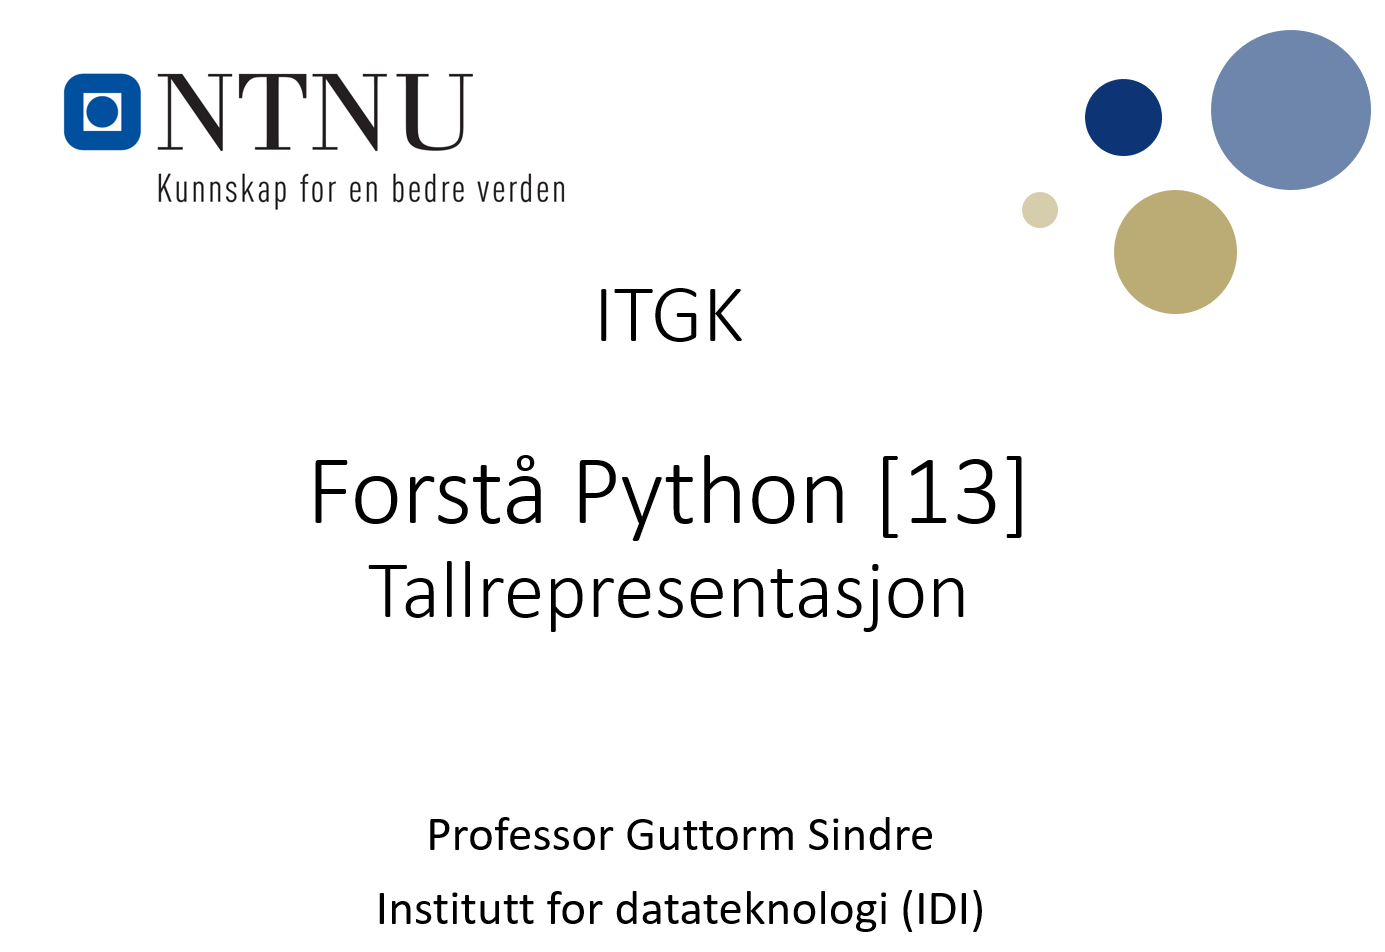

# Tallrepresentasjon

I dagliglivet brukes et tallsystem med base 10. Posisjonen til sifrene avgjør hvilken tierpotens de representerer. F.eks.
- 234 betyr $2\cdot10^2 + 3\cdot10^1 + 4\cdot10^0 = 200 + 30 + 4$
- 0.567 betyr $5\cdot10^{-1} + 6\cdot10^{-2} + 7\cdot10^{-3} = 0.5 + 0.06 + 0.007$

I datamaskinen brukes det binære tallsystemet, med base 2, hvor kun sifrene 0 og 1 benyttes. 

Vi vil her ta for oss:
- binær representasjon av heltall
- binær representasjon av flyttall

## Binær representasjon av heltall
I Python kan vi representere 
- så lange heltall som helst, og 
- heltall kan alltid representeres eksakt. 

In [ ]:
x = 5
y = 234
z = 1208928708970789145799720932409709314709124357092450
# Vise binær representasjon for heltall med strengformat :b
print(f'{x} binært: {x:b}')
print(f'{y} binært: {y:b}')
print(f'{z} binært: {z:b}')

Fra koden over kan vi se at 
- 5 skrives 101 binært, altså
    - $1\cdot2^2 + 0\cdot2^1 + 1\cdot2^0 = 4 + 0 + 1$
- 234 skrives 11101010 binært, altså
    - $1\cdot2^7 + 1\cdot2^6 + 1\cdot2^5 + 0\cdot2^4 + 1\cdot2^3 + 0\cdot2^2 + 1\cdot2^1 + 0\cdot2^0 = 128 + 64 + 32 + 0 + 8 + 0 + 2 + 0$

## Negative heltall, toerkomplement
For negative heltall gir strengkonvertering med format __:b__ et litt feil bilde av intern maskinrepresentasjon

22 binært er 10110, men det fins ikke minustegn i minnet, bare 0'er og 1'er.

In [ ]:
print(f'{-22:b}')

Hvis vi bruker 8 bits til å representere små heltall, kunne vi la fremste bit indikere fortegn (f.eks. 1 minus, 0 pluss)
- 8 bits kan da representere tallene fra og med -127 til og med +127
- -22 ville være 10010110 hvor fremste 1 bare indikerer minus

Dette sløser litt med plass fordi 0 får to representasjoner, +0 (00000000) og -0 (10000000)

Med en teknikk som heter __toerkomplement__ kan vi dekke tallene -128 til og med +127 med 8 bits
- her betyr 1 i fremste bit -128 heller enn bare negativt fortegn
- tallet -22 vil da representeres som 11101010
    - når vi starter med -128 må vi plusse på 106 for å ende opp med -22, og 106 er 1101010 som vist under
- +22 vil fortsatt representeres på vanlig måte: 00010110 med 8 bits

In [ ]:
differanse = -22 - (-128)
print(differanse) # Hva må resten av tallet være når vi har startet med -128 men skal ha -22?
print(f'{differanse:b}')

## Binær representasjon av flyttall
- mer innfløkt enn for heltall
- representeres som brøker av heltall
    - som vi mennesker også gjør, f.eks. 0.567 er implisitt brøken 567/1000
    - nevner er ren tierpotens, her $10^3 = 1000$ fordi vi bruker et tallsystem med base 10
- maskinen bruker base 2
    - nevner må være en ren toerpotens
- metoden __as_integer_ratio()__ 
    - viser heltallsbrøken et tall er representert som 

In [ ]:
x = 0.125
y = 0.1
print('x som heltallsbrøk: ', x.as_integer_ratio())
print('y som heltallsbrøk: ', y.as_integer_ratio())

Koden over illustrerer hvordan vi kan finne ut representasjonen av et flyttall i Python.
Som vi ser av eksemplenene
- 0.125 representeres som 1/8
- 0.1 representeres som 3602879701896397 / 36028797018963968

Hvorfor er ikke 0.1 representert rett fram som 1/10 i stedet? 
- Jo, fordi 10 er 2 \* 5, som _ikke_ er en ren toerpotens (mens 8 er 2\*2\*2)
- 1/8 er dermed lett å representere binært, mens 1/10 ikke

Hvilken toerpotens brukes for nevneren i brøken for 0.1? Det finner vi ut ved hjelp av koden under, ved å se hva nevneren er som binærtall og telle hvor mange nuller det har.

In [ ]:
teller = y.as_integer_ratio()[0]
nevner = y.as_integer_ratio()[1]
nevner_bin = f'{nevner:b}'
print(f'Nevneren til y som binærtall: {nevner_bin}')
print(f'Nevneren som toerpotens: 2 ** {len(nevner_bin) - 1} (antall nuller i tallet)')
print(f'0.1 representeres altså som 3602879701896397 / 2 ** 55')

Som vi ser er nevneren binært 10000000000000000000000000000000000000000000000000000000

Kun ett 1'tall etterfulgt av bare nuller tilsier at tallet er en ren toerpotens. 

Det er 55 nuller. Altså representeres 0.1 som 3602879701896397 / (2 ** 55)

Dette er det nærmeste tallet til 0.1 som vi får til med den aktuelle tallrepresentasjonen, og er altså ikke helt lik 0.1

0.125 kunne vi derimot representere helt eksakt som 1/8, altså 1 / 2**3